<p style="font-family: 'Arial', sans-serif; font-size: 3rem; color: #6a1b9a; text-align: center; margin: 0; 
           text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.1); background-color: #f5f5f5; padding: 10px; 
           border-radius: 10px; border: 4px solid #6a5acd; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.1); width: 97%;">
    <span style="font-weight: bold; color: #6a1b9a; animation: pulse 2s infinite;"></span>COMPX310-2025 Lab 6 <br> Gradient Descent and Logistic Regression
</p>

## Lab Information
- **Due Date:** Thursday November 7th, 23:59pm 
- **Weight:** 3% of total course grade
- **Platform:** Google Colab, Kaggle, or VSCode (with Jupyter extension)

---

## Student Information
**Please fill in your details:**
- **Name:** [Guo Zimo]
- **Student ID:** [20233006327]
- **Partner's Name (if applicable):** [Partner's Name]
- **Partner's Student ID (if applicable):** [Partner's ID]

---

## 📚 Lab Overview

In this lab, you will:
- Learn how gradient descent optimization works
- Understand the importance of feature scaling
- Visualize learning curves
- Apply logistic regression for multi-class classification

---

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1050/1*GSBP4uvvdl8D4YR9jdxcaA.png" width="800" height="500">
</div>

## Part A: Regression with Gradient Descent [1 Marks]

### What is Gradient Descent?

**Gradient Descent** is an optimization algorithm that helps models learn by:
1. Starting with random parameter values
2. Calculating the error (how wrong predictions are)
3. Adjusting parameters to reduce error
4. Repeating until error is minimized

**Think of it like:** Walking down a mountain while blindfolded. You feel the slope and take steps downward until you reach the valley (minimum error).

**Key Terms:**
- **Learning Rate (alpha):** Size of each step. Too big = overshoot. Too small = very slow.
- **Epoch:** One complete pass through all training data
- **SGD:** Stochastic Gradient Descent - updates parameters frequently for faster learning

---

### Dataset: California Housing

**URL:** Use 'housing.csv ' file or download from https://raw.githubusercontent.com/martianunlimited/compx310_datasets/main/housing.csv

**Features:**
- longitude, latitude
- housing_median_age
- total_rooms, total_bedrooms
- population, households
- median_income
- ocean_proximity (categorical)

**Target:** median_house_value (what we want to predict)

---

In [2]:
# Import all necessary libraries

# Data manipulation
import numpy as np
import pandas

# Numerical operations

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')# Your code here

In [3]:
# Load the California Housing dataset

# TODO: Load the dataset from the file provided
data = pandas.read_csv("housing.csv")

In [4]:
# Explore the dataset

# TODO: Display first 5 rows
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Check dataset information

# TODO: Check shape
print("Shape of data:")
print(data.shape)

# TODO: Check data types and missing values
print("Data types:")
print(data.dtypes)

# TODO: Get statistical summary
print("Statistical summary:")
print(data.describe())

Shape of data:
(20640, 10)
Data types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
Statistical summary:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  393

In [6]:
# Check for missing values

# TODO: Count missing values in each column
print("Number of missing values:")
print(data.isnull().sum())

Number of missing values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [7]:
# Your code here

---

### A.1 Data Preprocessing

Before building models, we need to:
1. Handle missing values
2. Convert categorical variables to numerical

---

In [8]:
# Handle missing values

# TODO: Fill missing values with median
# Hint: Use fillna() with median()
data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].median())

In [9]:
# Convert categorical variable 'ocean_proximity' to numerical

# TODO: Use one-hot encoding to convert 'ocean_proximity' to dummy variables
# Hint: Use pd.get_dummies()
data = pandas.get_dummies(data, columns=["ocean_proximity"])

In [10]:
# Verify preprocessing

# TODO: Check that there are no missing values
print("Number of missing values after handling:")
print(data.isnull().sum())

# TODO: Display first few rows to verify
print("Shape of data after handling:")
print(data.shape)

Number of missing values after handling:
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64
Shape of data after handling:
(20640, 14)


---

### A.2 Split Features and Target

---

In [11]:
# Separate features (X) and target (y)

# TODO: Create X with all columns except 'median_house_value'
X = data.drop("median_house_value", axis=1)

# TODO: Create y with only 'median_house_value'
y = data["median_house_value"]

print("Shape of X and y:")
print(X.shape)
print(y.shape)

Shape of X and y:
(20640, 13)
(20640,)


In [12]:
# Split into training and testing sets

# TODO: Use train_test_split with 80% train, 20% test
# Use random_state for reproducibility
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=6327)

In [13]:
# Display shapes

# TODO: Print shapes of X_train, X_test, y_train, y_test
print(X_training.shape)
print(X_test.shape)
print(y_training.shape)
print(y_test.shape)

(16512, 13)
(4128, 13)
(16512,)
(4128,)


In [14]:
# Define run_reg function

def run_reg(regressor, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a regression model.
    
    Steps:
    1. Train the regressor
    2. Make predictions on test set
    3. Clip predictions between 15000 and 500000
    4. Calculate MAE
    5. Plot actual vs predicted
    6. Return MAE
    """
    
    # TODO: Train the regressor
    # Hint: Use .fit(X_train, y_train)
    regressor.fit(X_train, y_train)
    
    # TODO: Make predictions on test set
    # Hint: Use .predict(X_test)
    y_pred = regressor.predict(X_test)
    
    # TODO: Clip predictions to [15000, 500000]
    # Hint: Use np.clip()
    np.clip(y_pred, 15000, 500000, out=None)
    
    # TODO: Calculate MAE
    # Hint: Import and use mean_absolute_error
    mae = mean_absolute_error(y_test, y_pred)
    
    # TODO: Create scatter plot
    # Plot actual vs predicted values
    # Add a diagonal line (perfect predictions)
    # Show MAE in title
    plt.figure(figsize=(10, 8))
    plt.scatter(y_test, y_pred)
    
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.xlim(15000, 500000)
    plt.ylim(15000, 500000)

    plt.title("Scatter of prediction and actual values")
    plt.xlabel("Actual values")
    plt.ylabel("Prediction values")
    
    plt.show
    # TODO: Return MAE
    return mae

---

### A.4 Run SGD with Different Learning Rates (Unscaled Data)

**IMPORTANT:** Replace `ID` below with YOUR actual student ID number.

---

In [15]:
# Set your student ID

ID = 6327 # TODO: Replace with YOUR student ID

MAE of SGD model 1:
82206.0075925464


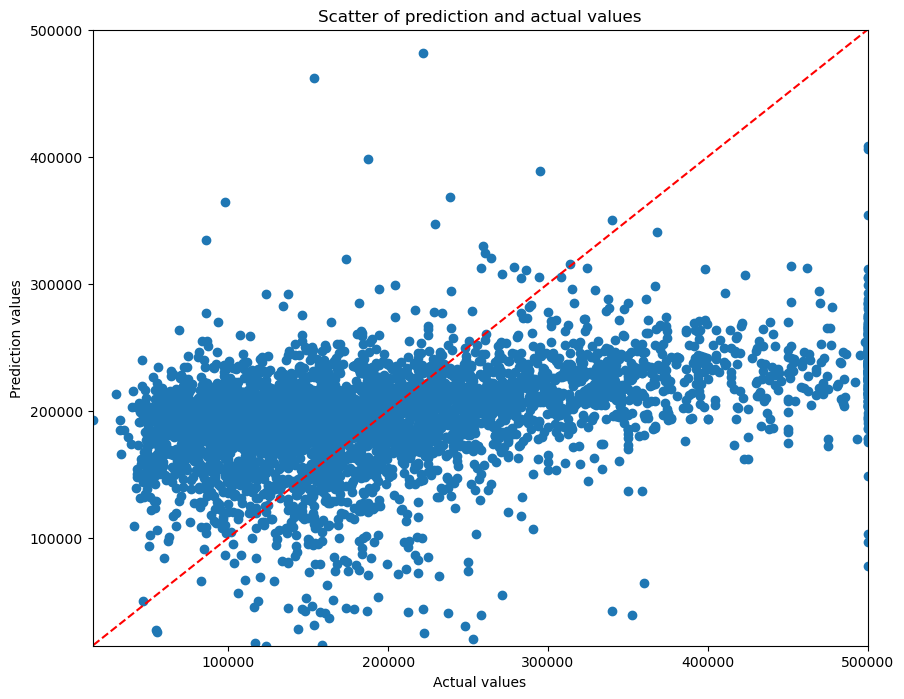

In [16]:
# SGD with learning_rate = 0.00000001 (unscaled data)

# TODO: Create SGDRegressor with learning_rate='constant', eta0=0.00000001, random_state=ID
sgd_model_1 = SGDRegressor(learning_rate="constant", eta0=0.00000001, random_state=ID)

# TODO: Call run_reg function
mae_sgd_1 = run_reg(sgd_model_1, X_training, X_test, y_training, y_test)

# TODO: Print the MAE result
print("MAE of SGD model 1:")
print(mae_sgd_1)

MAE of SGD model 2:
433478154254396.6


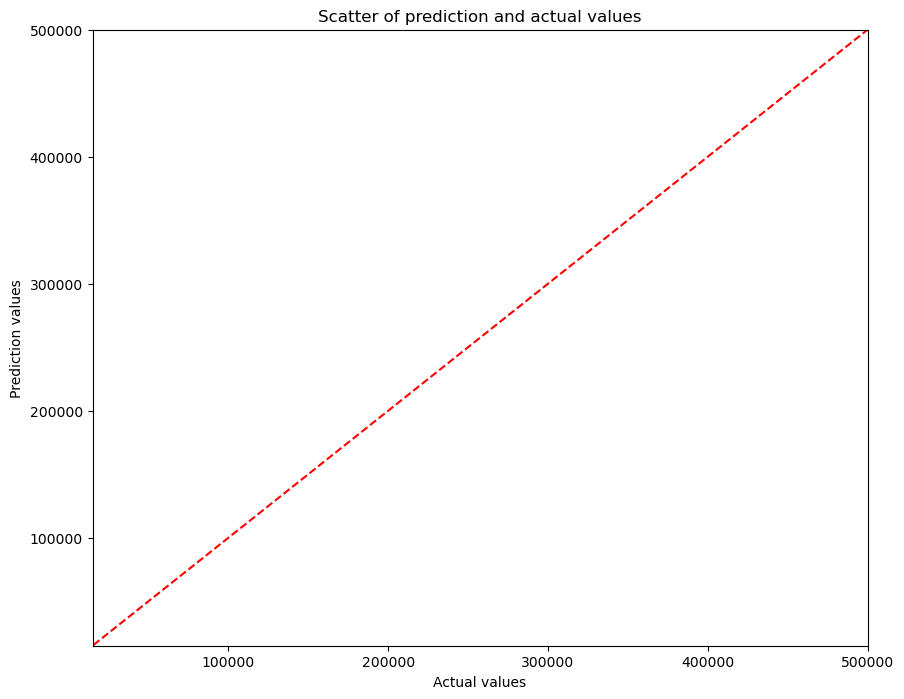

In [17]:
# SGD with learning_rate = 0.0001 (unscaled data)

# TODO: Create SGDRegressor with learning_rate='constant', eta0=0.0001, random_state=ID
sgd_model_2 = SGDRegressor(learning_rate="constant", eta0=0.0001, random_state=ID)

# TODO: Call run_reg function
mae_sgd_2 = run_reg(sgd_model_2, X_training, X_test, y_training, y_test)

# TODO: Print the MAE result
print("MAE of SGD model 2:")
print(mae_sgd_2)

---

### A.5 Feature Scaling

**Why Scale Features?**

Features have different ranges:
- Some: 0-10
- Others: 0-100,000

**Problem:** Gradient descent struggles with different scales. Steps are too big for some features and too small for others.

**Solution:** **Standardization** - Transform all features to mean=0, std=1

Formula: `(x - mean) / standard_deviation`

---

In [18]:
# Scale the features using StandardScaler

# TODO: Create StandardScaler object
sc = StandardScaler()

# TODO: Fit and transform X_train (use fit_transform)
X_training_scaled = sc.fit_transform(X_training)

# TODO: Transform X_test (use transform only, NOT fit_transform)
X_test_scaled = sc.transform(X_test)

In [19]:
# Verify scaling

# TODO: Check mean and std of X_train_scaled
# Should be close to 0 and 1
print("Mean of X_training_scaled")
print(X_training_scaled[:5, :])

Mean of X_training_scaled
[[-0.84543888  1.43665072 -0.92752623  0.58448014  0.24323647  0.33598019
   0.1712656   0.7245581  -0.88899204  1.46831989 -0.01556621 -0.35196156
  -0.38866835]
 [ 0.43188675 -0.63127695 -0.29104899 -0.12010253 -0.10884188 -0.19697081
  -0.15740231  0.43591855  1.12486947 -0.6810505  -0.01556621 -0.35196156
  -0.38866835]
 [-0.68078362  1.34755633 -1.08664554 -0.63664399 -0.72438021 -0.78417956
  -0.74374585 -0.28213989 -0.88899204  1.46831989 -0.01556621 -0.35196156
  -0.38866835]
 [-0.86539709  1.0943407   0.18630894  0.01303614  0.65998227 -0.0236961
   0.58407249 -1.44356924 -0.88899204  1.46831989 -0.01556621 -0.35196156
  -0.38866835]
 [-1.6537465   1.32879961 -0.29104899 -0.49252481 -0.53277295 -0.6021536
  -0.5097343  -0.68632968  1.12486947 -0.6810505  -0.01556621 -0.35196156
  -0.38866835]]


---

### A.6 Run SGD with Scaled Data

---

MAE of SGD model 3:
173660.91382691398


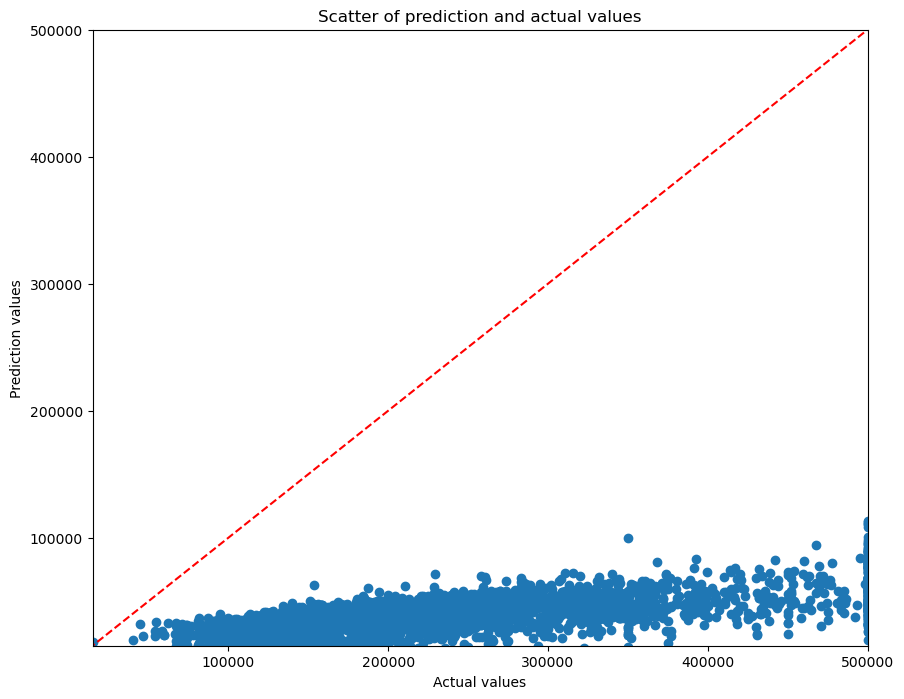

In [20]:
# SGD with learning_rate = 0.00000001 (scaled data)

# TODO: Create SGDRegressor with learning_rate='constant', eta0=0.00000001, random_state=ID
sgd_model_3 = SGDRegressor(learning_rate="constant", eta0=0.00000001, random_state=ID)

# TODO: Call run_reg with X_train_scaled and X_test_scaled
mae_sgd_3 = run_reg(sgd_model_3, X_training_scaled, X_test_scaled, y_training, y_test)

# TODO: Print the MAE result
print("MAE of SGD model 3:")
print(mae_sgd_3)

MAE of SGD model 4:
49135.956418040994


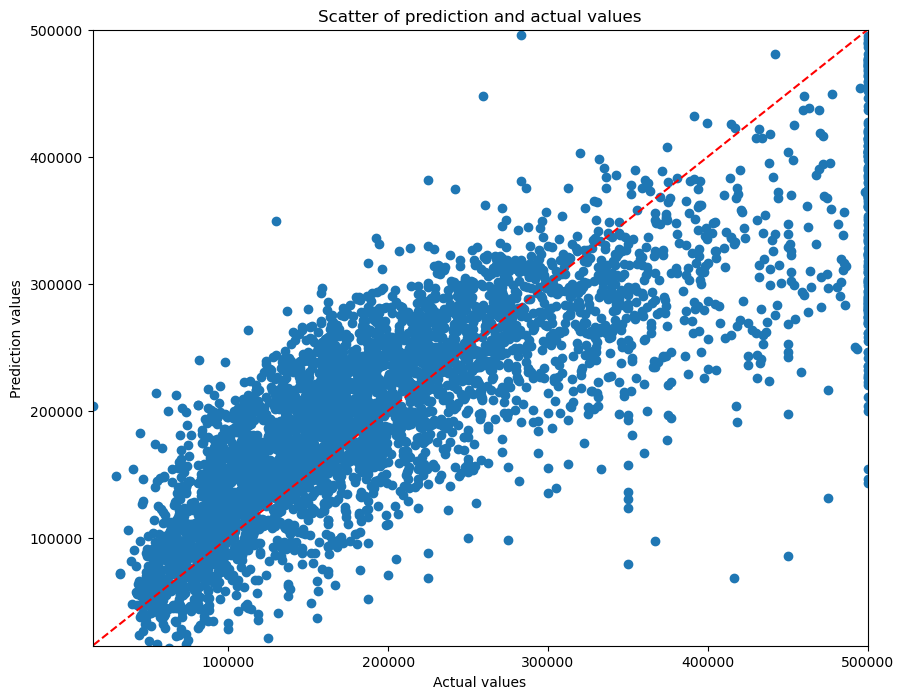

In [21]:
# SGD with learning_rate = 0.0001 (scaled data)

# TODO: Create SGDRegressor with learning_rate='constant', eta0=0.0001, random_state=ID
sgd_model_4 = SGDRegressor(learning_rate="constant", eta0=0.0001, random_state=ID)

# TODO: Call run_reg with X_train_scaled and X_test_scaled
mae_sgd_4 = run_reg(sgd_model_4, X_training_scaled, X_test_scaled, y_training, y_test)

# TODO: Print the MAE result
print("MAE of SGD model 4:")
print(mae_sgd_4)

---

### A.7 Analysis: Unscaled vs Scaled Data

**Question:** Compare results from unscaled (A.4) vs scaled (A.6) data. What differences do you observe?

---

In [22]:
# Write your analysis

"""
TODO: Answer the following questions:

1. Comparison with learning_rate = 0.00000001:
   - Unscaled MAE: 82206
   - Scaled MAE: 173660
   - Observation: When learning rate is very small, SGD model with unscaled data has better performance than 
                  the model with scaled data.


2. Comparison with learning_rate = 0.0001:
   - Unscaled MAE: 433478154254396
   - Scaled MAE: 49135
   - Observation: When learning rate is big, SGD model without feature scaling may can't train successfully. And With 
                  scaled data, SGD perform better than small learning rate.


3. Why does scaling make such a big difference?
   

4. Which combination (learning rate + scaling) works best?
   0.0001 + with feature scaling.

"""

"\nTODO: Answer the following questions:\n\n1. Comparison with learning_rate = 0.00000001:\n   - Unscaled MAE: 82206\n   - Scaled MAE: 173660\n   - Observation: When learning rate is very small, SGD model with unscaled data has better performance than \n                  the model with scaled data.\n\n\n2. Comparison with learning_rate = 0.0001:\n   - Unscaled MAE: 433478154254396\n   - Scaled MAE: 49135\n   - Observation: When learning rate is big, SGD model without feature scaling may can't train successfully. And With \n                  scaled data, SGD perform better than small learning rate.\n\n\n3. Why does scaling make such a big difference?\n   \n\n4. Which combination (learning rate + scaling) works best?\n   0.0001 + with feature scaling.\n\n"

---

## Part B: Learning Curves [1.0 Mark]

### What are Learning Curves?

**Learning Curves** show how model error changes during training.

**What to look for:**
- **Good:** Smoothly decreasing error that stabilizes
- **Learning rate too high:** Error jumps wildly, doesn't converge
- **Learning rate too low:** Error decreases very slowly

---

In [61]:
# Define learning curve function

def run_training_curve(X_train, X_test, y_train, y_test, learning_rate=0.000000001, no_epoch=1000):
    """
    Train SGDRegressor epoch by epoch and plot learning curves.
    """
    sgd = SGDRegressor(random_state=1234567, verbose=0, 
                       learning_rate='constant', eta0=learning_rate)
    
    train_loss_list = []
    test_loss_list = []
    
    for epoch in range(no_epoch):
        sgd.partial_fit(X_train, y_train)
        y_pred_train = sgd.predict(X_train)
        y_pred_test = sgd.predict(X_test)
        train_loss_list.append(np.sqrt(np.mean((y_pred_train - y_train)**2)))
        test_loss_list.append(np.sqrt(np.mean((y_pred_test - y_test)**2)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss_list, label=f'Training Loss {np.min(train_loss_list[500:]):.6}')
    plt.plot(test_loss_list, label=f'Test Loss {np.min(test_loss_list[500:]):.6}')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE Loss')
    plt.legend()
    plt.title(f"Learning Curve (Learning Rate={learning_rate})")
    plt.grid(True, alpha=0.3)
    plt.show()

---

### B.1 Plot Learning Curves for 5 Cases

---

Case A: Unscaled Data, Learning Rate = 0.00000001


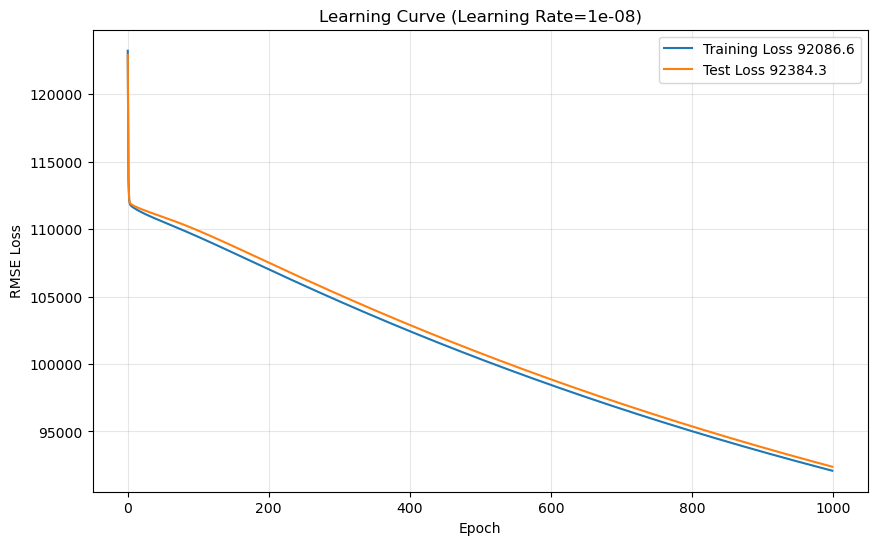

In [57]:
# Case A - Unscaled data, learning_rate = 0.00000001

print("Case A: Unscaled Data, Learning Rate = 0.00000001")
print("="*60)

# TODO: Call run_training_curve with X_train, X_test, y_train, y_test, learning_rate=0.00000001
run_training_curve(X_training, X_test, y_training, y_test, 0.00000001)

Case B: Unscaled Data, Learning Rate = 0.0001


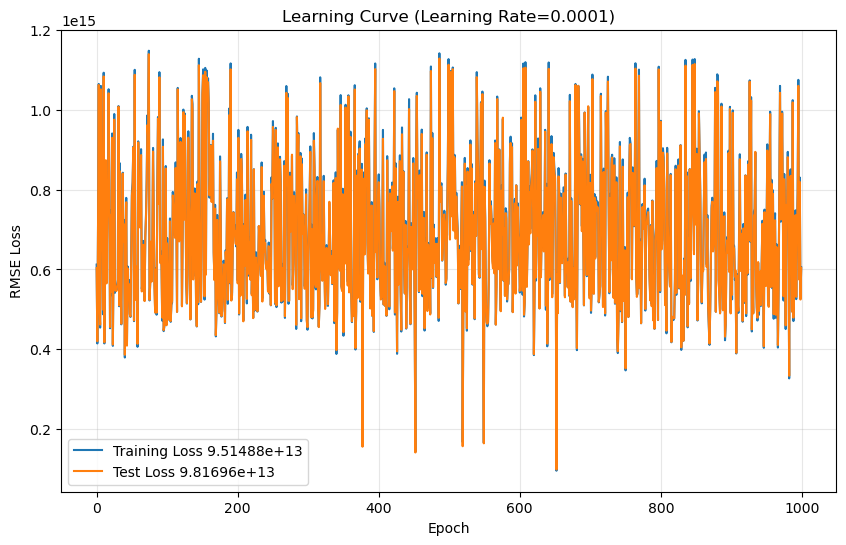

In [50]:
# Case B - Unscaled data, learning_rate = 0.0001

print("Case B: Unscaled Data, Learning Rate = 0.0001")
print("="*60)

# TODO: Call run_training_curve with X_train, X_test, y_train, y_test, learning_rate=0.0001
run_training_curve(X_training, X_test, y_training, y_test, 0.0001)


Case C: Scaled Data, Learning Rate = 0.00000001


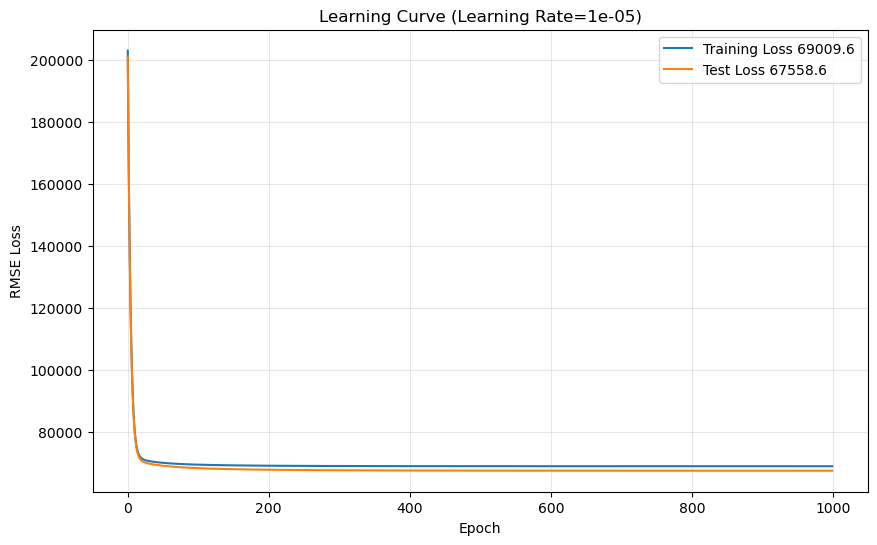

In [62]:
# Case C - Scaled data, learning_rate = 0.00000001

print("Case C: Scaled Data, Learning Rate = 0.00000001")
print("="*60)

# TODO: Call run_training_curve with X_train_scaled, X_test_scaled, y_train, y_test, learning_rate=0.00000001
run_training_curve(X_training_scaled, X_test_scaled, y_training, y_test, 0.00001)

Case E: Scaled Data, Learning Rate = 1.0


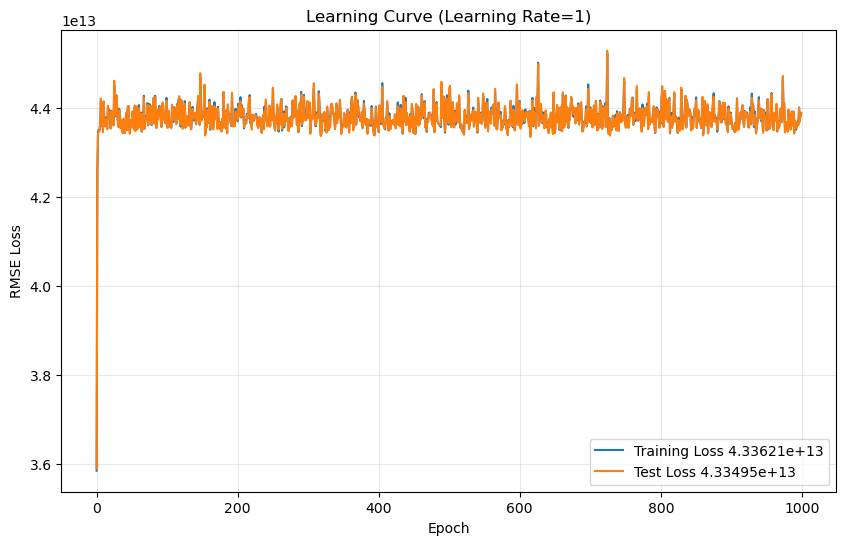

In [52]:
# Case E - Scaled data, learning_rate = 1

print("Case E: Scaled Data, Learning Rate = 1.0")
print("="*60)

# TODO: Call run_training_curve with X_train_scaled, X_test_scaled, y_train, y_test, learning_rate=1
run_training_curve(X_training_scaled, X_test_scaled, y_training, y_test, 1)

---

### B.2 Analysis of Learning Curves

---

In [ ]:
# Answer questions about learning curves

"""
TODO: Answer the following questions based on your learning curves:

1. Case A (Unscaled, lr=0.00000001):
   - Is the model learning? Is it converging?
   - If we increased epochs to 5000, would it reach a better solution?
   
   Your answer: 1. Yes.
   2. Yes. More iteration bring less test loss. But it take more time to traing model.


2. Case B (Unscaled, lr=0.0001):
   - Why is the loss jumping around and not converging?
   - What's happening with the gradient descent steps?
   
   Your answer: Because the learning rate is too high so when model reach the position near to the buttom, 
   it can't really reach that point and just jump around the best point.


3. Case C (Scaled, lr=0.00000001):
   - How does this compare to Case A?
   - Could we increase learning rate or epochs to improve?
   
   Your answer: Test loss is worse than case A. We could improve model by increasing epochs and learning rate.


4. Case D (Scaled, lr=0.0001):
   - Is this converging well?
   - Could we use fewer epochs and still get good results?
   
   Your answer: 


5. Case E (Scaled, lr=1.0):
   - What's happening here?
   - Is this learning rate too high or too low?
   
   Your answer:



6. Overall: Why is feature scaling so important for gradient descent?

   Your answer:


"""

"\nTODO: Answer the following questions based on your learning curves:\n\n1. Case A (Unscaled, lr=0.00000001):\n   - Is the model learning? Is it converging?\n   - If we increased epochs to 5000, would it reach a better solution?\n   \n   Your answer: 1. Yes.\n   2. Yes. More iteration bring less test loss. But it take more time to traing model.\n\n\n2. Case B (Unscaled, lr=0.0001):\n   - Why is the loss jumping around and not converging?\n   - What's happening with the gradient descent steps?\n   \n   Your answer:\n\n\n3. Case C (Scaled, lr=0.00000001):\n   - How does this compare to Case A?\n   - Could we increase learning rate or epochs to improve?\n   \n   Your answer:\n\n\n4. Case D (Scaled, lr=0.0001):\n   - Is this converging well?\n   - Could we use fewer epochs and still get good results?\n   \n   Your answer:\n\n\n5. Case E (Scaled, lr=1.0):\n   - What's happening here?\n   - Is this learning rate too high or too low?\n   \n   Your answer:\n\n\n6. Overall: Why is feature scal

---

## Part C: Logistic Regression [1 Mark]

### What is Logistic Regression?

**Logistic Regression** is used for **classification** (predicting categories, not numbers).

**Key Differences from Linear Regression:**

| Linear Regression | Logistic Regression |
|------------------|---------------------|
| Predicts continuous values | Predicts categories |
| Output: any number | Output: probability (0 to 1) |
| Example: house price | Example: flower species |

**How it works:**
- Uses **sigmoid function** to convert outputs to probabilities
- Probability → Class prediction
---

<div align="center">
  <img src="https://tutorialforbeginner.com/images/tutorial/logistic-regression-in-machine-learning.png" width="800" height="500">
</div>

---

### Dataset: Iris

The **Iris dataset** contains measurements of 150 iris flowers from 3 species.

**Features:**
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

**Target:** Species (0, 1, or 2)
- 0 = Setosa
- 1 = Versicolor  
- 2 = Virginica

**This is multi-class classification** (3 classes).

---

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/0*7H_gF1KnslexnJ3s" width="800" height="500">
</div>

In [29]:
# Load Iris dataset

# TODO: Load iris dataset from sklearn.datasets

# TODO: Convert to DataFrame

# TODO: Add target column

In [30]:
# Explore the dataset

# TODO: Display first 5 rows

# TODO: Check shape

# TODO: Check info

In [31]:
# Check target distribution

# TODO: Count how many samples for each species

In [32]:
# Visualization 1 - Target distribution

# TODO: Create countplot showing distribution of 3 species

In [33]:
# Visualization 3 - Boxplots for each feature

# TODO: Create 4 boxplots (one for each feature) comparing the 3 species
# Use subplots (2 rows, 2 columns)

In [34]:
# Separate features and target

# TODO: Create X (all columns except target)

# TODO: Create y (only target column)

In [35]:
# Split into train and test sets

# TODO: Split with 80% train, 20% test
# Use stratify=y to keep balanced classes
# Use random_state for reproducibility

In [36]:
# Check class distribution in train and test

# TODO: Print value counts for y_train and y_test

In [37]:

# Scale the features

# TODO: Use StandardScaler to scale X_train and X_test

---

### C.3 Build Logistic Regression Model

---

In [38]:
# Train Logistic Regression model

# TODO: Create LogisticRegression with max_iter=1000

# TODO: Train the model using fit()

In [39]:
# Make predictions

# TODO: Predict on test set

In [40]:
# Get prediction probabilities

# TODO: Get predict_proba on test set
# This shows probability for each class

# TODO: Display first 5 probability predictions

---

### C.4 Model Evaluation

**Classification Metrics:**

1. **Accuracy:** Percentage of correct predictions

2. **Confusion Matrix:** Shows correct and incorrect predictions for each class

3. **Precision:** Of predicted class X, how many are actually class X?

4. **Recall:** Of actual class X, how many did we correctly predict?

5. **F1-Score:** Balance between precision and recall

---

In [41]:
# Calculate accuracy

# TODO: Calculate and print accuracy score

In [42]:
# Display confusion matrix

# TODO: Calculate confusion matrix

# TODO: Print confusion matrix

In [43]:
# Visualize confusion matrix

# TODO: Create heatmap of confusion matrix
# Hint: Use seaborn heatmap with annot=True

In [44]:
# Display classification report

# TODO: Print classification report
# Shows precision, recall, f1-score for each class

---

### C.5 Test Different Parameters

Logistic Regression has a **C parameter** (regularization strength).

- **Small C** → Strong regularization → Simpler model
- **Large C** → Weak regularization → More complex model

---

In [45]:
# Test different C values

# TODO: Loop through C values: [0.01, 0.1, 1, 10, 100]
# For each C:
#   - Create LogisticRegression with that C value
#   - Train on training data
#   - Calculate accuracy on test data
#   - Store C value and accuracy

# TODO: Print results table showing C vs Accuracy

In [46]:
# Plot C vs Accuracy

# TODO: Create line plot showing how accuracy changes with C

In [47]:
# Write your analysis and conclusions

"""
TODO: Answer the following questions:

1. Model Performance:
   - What is the accuracy of your model?
   - Which species is easiest to classify? (Check confusion matrix)
   - Which species is hardest to classify?
   
   Your answer:


2. Feature Importance:
   - Which features seem most important for classification? (Check pairplot)
   
   Your answer:


3. Regularization:
   - Which C value gives the best accuracy?
   - Does strong regularization help or hurt performance?
   
   Your answer:


4. Comparison with Linear Regression (from Part A):
   - How is logistic regression similar to linear regression?
   - How is it different?
   - Did scaling help logistic regression too?
   
   Your answer:


"""

'\nTODO: Answer the following questions:\n\n1. Model Performance:\n   - What is the accuracy of your model?\n   - Which species is easiest to classify? (Check confusion matrix)\n   - Which species is hardest to classify?\n   \n   Your answer:\n\n\n2. Feature Importance:\n   - Which features seem most important for classification? (Check pairplot)\n   \n   Your answer:\n\n\n3. Regularization:\n   - Which C value gives the best accuracy?\n   - Does strong regularization help or hurt performance?\n   \n   Your answer:\n\n\n4. Comparison with Linear Regression (from Part A):\n   - How is logistic regression similar to linear regression?\n   - How is it different?\n   - Did scaling help logistic regression too?\n   \n   Your answer:\n\n\n'

---

## 📊 Submission Checklist

Before submitting, verify you have completed:

**Part A: Regression [1.5 marks]**
- [ ] Loaded California Housing dataset
- [ ] Handled missing values and categorical variables
- [ ] Created run_reg function
- [ ] Ran SGD with 2 learning rates (unscaled)
- [ ] Scaled features
- [ ] Ran SGD with 2 learning rates (scaled)
- [ ] Analyzed unscaled vs scaled results

**Part B: Learning Curves [1.0 mark]**
- [ ] Plotted 5 learning curves (Cases A-E)
- [ ] Analyzed each learning curve
- [ ] Answered all discussion questions

**Part C: Logistic Regression [1 marks]**
- [ ] Loaded Iris dataset
- [ ] Created 3 EDA visualizations
- [ ] Preprocessed and scaled data
- [ ] Built Logistic Regression model
- [ ] Evaluated with metrics and confusion matrix
- [ ] Tested different C values
- [ ] Wrote analysis and conclusions

**General:**
- [ ] Name and ID in first cell
- [ ] All code runs without errors
- [ ] All TODO items completed

---

**Good luck! 🚀**